# Classification Dataset Preprocessing - Task [066]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftfy import fix_text
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
df2 = pd.read_csv('../../datasets/XWines_Full_100K_wines.csv')

# Fixing text
for col in df2.columns:
    if df2[col].dtype == 'object': 
        df2[col] = df2[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

### Removing grapes and types that are not present in the dataset used for predicting the price

In [4]:
# Removing the types

print(df2.shape)
df2['Type'] = df2['Type'].apply(lambda x: x if x in ['Red', 'White', 'Rosé'] else np.nan)
df2 = df2.dropna()
print(df2.shape)

# Removing the Grapes

grapes = df2['Grapes'].str.split(',').explode().unique()

grapes = [grape.replace(']', '').replace('[', '').replace(',', '').replace("'", '').strip() for grape in grapes]

grapes2 = ['Tempranillo', 'Chardonnay', 'Sauvignon Blanc', 'Pinot Noir', 'Glera', 'Chenin Blanc', 'Castelão ', 'Malagousia', 'Cinsault', 'Grenache', 'Shiraz', 'Cabernet Sauvignon', 'Bacchus', 'Viognier', 'Pinot Grigio', 'Garnacha', 'Malbec', 'Cortese', 'Merlot', 'Melon De Bourgogne', 'Carménère', 'Zinfandel', 'Syrah', 'Marsanne', 'Gruner Veltliner', 'Corvina', 'Greco', 'Macabeo', 'Gamay', 'Loureiro', 'Riesling', 'Alvarinho', 'Mourvèdre', 'Cabernet Franc', 'Vespaiola', 'Picpoul', 'Vermentino', 'Sangiovese', 'Pinot Meunier', 'Verdejo', 'Primitivo', 'Pinotage', 'Alicante Bouschet', 'Garganega', 'Godello', 'Carignan', 'Grenache Blanc', 'Aligoté', 'Siegerrebe', 'Touriga Nacional', 'Albarino', 'Nerello Mascalese', "Nero D'Avola", 'Turbiana', 'Pinot Gris', 'Airen', 'Trincadeira', 'Tinta Roriz', 'Xinomavro', 'Agiorgitiko', 'Pais', 'Gewürztraminer', 'Mencia', 'Verdicchio', 'Fiano', 'Rondinella', 'Mauzac', 'Nebbiolo', 'Lambrusco Grasparossa', 'Pecorino', 'Negroamaro', 'Fernão Pires', 'Feteasca Alba', 'Zwieigelt', 'Grillo', 'Tinta Barroca', 'Furmint', 'Touriga Franca', 'Pedro Ximénez', 'Palomino', 'Viura', 'Montepulciano', 'Barbera', 'Malvasia', 'Arinto', 'Colombard', 'Sémillon', 'Jacquere', 'Pinot Blanc', 'Rkatsiteli', 'Syrah-Shiraz', 'Torrontes', 'Sauvignon Gris', 'Assyrtiko', 'Moscato', 'Rolle', 'Huxelrebe', 'Xarel-Lo', 'Niellucciu', 'Saperavi', 'Rara Neagra', 'Non Varietal', 'Muscat', 'Monastrell', 'Dolcetto', 'Black Muscat', 'Nerello', 'Roussanne', 'Tibouren', 'Grolleau', 'Inzolia', 'Falanghina', 'Aglianico']

grapes = list(set(grapes) & set(grapes2))

df2['Grapes'] = df2['Grapes'].apply(lambda x: ast.literal_eval(x))

grape_columns = [col for col in df2.columns if col.startswith('Grapes_')]

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: [grape for grape in x if grape in grapes]
)

df2['Grapes_count'] = df2['Grapes'].apply(len)
rows_with_no_grapes = df2[df2['Grapes_count'] == 0].index
df2.drop(rows_with_no_grapes, inplace=True)

(100646, 17)
(73477, 17)


### Treating the Harmonize columns (Dish Generalization and OneHotEncoding)

In [5]:
# Replace dishes with their broader categories in the Harmonize column
df2['Harmonize'] = df2['Harmonize'].apply(eval)
dish_to_category = {
    'Beef': 'Meat', 'Lamb': 'Meat', 'Pork': 'Meat', 'Veal': 'Meat', 'Game Meat': 'Meat',
    'Duck': 'Meat', 'Ham': 'Meat', 'Cold Cuts': 'Meat', 'Cured Meat': 'Meat',
    'Poultry': 'Poultry', 'Chicken': 'Poultry',
    'Rich Fish': 'Fish & Seafood', 'Lean Fish': 'Fish & Seafood', 'Shellfish': 'Fish & Seafood',
    'Seafood': 'Fish & Seafood', 'Sushi': 'Fish & Seafood', 'Sashimi': 'Fish & Seafood',
    'Codfish': 'Fish & Seafood', 'Fish': 'Fish & Seafood', 'Grilled': 'Fish & Seafood',
    'Soft Cheese': 'Cheese', 'Hard Cheese': 'Cheese', 'Blue Cheese': 'Cheese',
    'Maturated Cheese': 'Cheese', 'Goat Cheese': 'Cheese', 'Mild Cheese': 'Cheese',
    'Medium-cured Cheese': 'Cheese', 'Cheese': 'Cheese',
    'Pasta': 'Pasta', 'Tagliatelle': 'Pasta', 'Lasagna': 'Pasta',
    'Paella': 'Fish & Seafood', 'Pizza' : 'Pasta',
    'Vegetarian': 'Vegetarian & Vegan', 'Mushrooms': 'Vegetarian & Vegan', 'Salad': 'Vegetarian & Vegan',
    'Fruit': 'Vegetarian & Vegan', 'Tomato Dishes': 'Vegetarian & Vegan', 'Beans': 'Vegetarian & Vegan',
    'Eggplant Parmigiana': 'Vegetarian & Vegan', 'Light Stews': 'Vegetarian & Vegan',
    'Appetizer': 'Appetizers & Snacks', 'Snack': 'Appetizers & Snacks',
    'Aperitif': 'Appetizers & Snacks', 'French Fries': 'Appetizers & Snacks', 'Baked Potato': 'Appetizers & Snacks',
    'Cream': 'Appetizers & Snacks',
    'Sweet Dessert': 'Desserts', 'Fruit Dessert': 'Desserts', 'Citric Dessert': 'Desserts',
    'Cake': 'Desserts', 'Chocolate': 'Desserts', 'Cookies': 'Desserts',
    'Chestnut': 'Desserts', 'Spiced Fruit Cake': 'Desserts', 'Dessert': 'Desserts',
    'Soufflé': 'Desserts', 'Dried Fruits': 'Desserts',
    'Spicy Food': 'Spicy Food', 'Curry Chicken': 'Spicy Food', 'Asian Food': 'Spicy Food', 'Yakissoba': 'Spicy Food',
    'Barbecue': 'Meat', 'Roast': 'Meat'
}

columns = df2.columns
new_harmonize = df2.copy()
new_harmonize['Harmonize'] = df2['Harmonize'].apply(lambda x: list(set(dish_to_category.get(dish, dish) for dish in x)))

new_harmonize = new_harmonize.explode('Harmonize')

new_harmonize.reset_index(drop=True, inplace=True)
new_harmonize = new_harmonize[new_harmonize['Harmonize'].apply(lambda x: 'Risotto' not in x)]
df2 = new_harmonize.copy()

unique_categories = df2['Harmonize'].unique()

for dish in unique_categories:
    new_harmonize[f'Harmonize_{dish}'] = new_harmonize['Harmonize'].apply(lambda x: x == dish)

new_harmonize = new_harmonize.drop(columns=columns)

### Preprocessing the rest of the columns

In [6]:
all_grapes = set(g for sublist in df2['Grapes'] for g in sublist)  # Unique grape types
for grape in all_grapes:
    df2[f'Grapes_{grape}'] = df2['Grapes'].apply(lambda x: grape in x)
df2 = df2.drop(columns=['Grapes'])

#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity', 'Grapes'
one_hot_encoded_df = pd.get_dummies(df2, columns=['Type', 'Elaborate', 'Body', 'Acidity'])

encoded_df = one_hot_encoded_df.copy()

# Normalizing the 'ABV' column
scaler = MinMaxScaler()
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])

# Dropping unnecessary columns
encoded_df = encoded_df.drop(columns=['Country', 'RegionName', 'Code', 'WineName', 'WineID', 'Vintages', 'Website', 'WineryID', 'WineryName', 'RegionID','Harmonize'])
encoded_df = encoded_df.dropna()


encoded_df = pd.concat([encoded_df, new_harmonize], axis=1)

threshold = 1000

grape_columns = [col for col in encoded_df.columns if col.startswith("Grapes_")]

grape_counts = encoded_df[grape_columns].sum(axis=0)

low_entry_grapes = grape_counts[grape_counts < threshold].index

encoded_df_filtered = encoded_df[~encoded_df[low_entry_grapes].any(axis=1)]

columns_to_keep = encoded_df_filtered.columns[encoded_df_filtered.sum(axis=0) > 0]
encoded_df = encoded_df_filtered[columns_to_keep]


### Creation of an alternative dataset without blends

In [7]:
# Filter rows with more than one grape column as true
encoded_df_without_blends = encoded_df.copy()
rows_with_multiple_grapes = encoded_df_without_blends[encoded_df_without_blends['Grapes_count'] > 1]
encoded_df_without_blends = encoded_df_without_blends.drop(rows_with_multiple_grapes.index)
encoded_df_without_blends.drop(columns=['Grapes_count'], inplace=True)

grape_columns = [col for col in encoded_df_without_blends.columns if col.startswith("Grapes_")]
grape_counts = encoded_df_without_blends[grape_columns].sum(axis=0)
low_entry_grapes = grape_counts[grape_counts < threshold].index
encoded_df_without_blends = encoded_df_without_blends[~encoded_df_without_blends[low_entry_grapes].any(axis=1)]
columns_to_keep = encoded_df_without_blends.columns[encoded_df_without_blends.sum(axis=0) > 0]
encoded_df_without_blends = encoded_df_without_blends[columns_to_keep]

encoded_df.drop(columns=['Grapes_count'], inplace=True)

# Display the filtered DataFrame shape for debugging
print(encoded_df.shape)

(148982, 71)


/var/folders/6h/0l3gfc0j6tzd_c06lmf1bkqh0000gn/T/ipykernel_74004/2048262225.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df.drop(columns=['Grapes_count'], inplace=True)


In [16]:
display(encoded_df)
display(encoded_df_without_blends)

,ABV,Grapes_Roussanne,Grapes_Grenache Blanc,Grapes_Cinsault,Grapes_Chenin Blanc,Grapes_Malbec,Grapes_Riesling,Grapes_Sangiovese,Grapes_Chardonnay,Grapes_Nebbiolo,...,Acidity_Medium,Harmonize_Poultry,Harmonize_Meat,Harmonize_Cheese,Harmonize_Spicy Food,Harmonize_Vegetarian & Vegan,Harmonize_Fish & Seafood,Harmonize_Appetizers & Snacks,Harmonize_Pasta,Harmonize_Desserts
0,0.666667,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,0.666667,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0.611111,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,0.611111,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,0.694444,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162824,0.694444,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
162825,0.750000,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
162826,0.750000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
162827,0.750000,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


,ABV,Grapes_Chenin Blanc,Grapes_Malbec,Grapes_Riesling,Grapes_Sangiovese,Grapes_Chardonnay,Grapes_Nebbiolo,Grapes_Barbera,Grapes_Pinot Noir,Grapes_Pinot Gris,...,Acidity_Medium,Harmonize_Poultry,Harmonize_Meat,Harmonize_Cheese,Harmonize_Spicy Food,Harmonize_Vegetarian & Vegan,Harmonize_Fish & Seafood,Harmonize_Appetizers & Snacks,Harmonize_Pasta,Harmonize_Desserts
0,0.666667,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,0.666667,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.694444,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,0.694444,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,0.750000,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162824,0.694444,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
162825,0.750000,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
162826,0.750000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
162827,0.750000,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


## Preprocessing Summary

* Fixed text that had encoding problems
* Excluded grape varieties not present in the dataset used for price prediction.
* Simplified dish names in the Harmonize column by removing overly specific dishes with very few wine pairings.
* Duplicated entries for wines with multiple dishes in the Harmonize column, creating one row per dish from the original array.
* Applied one-hot encoding to all columns except ABV.
* Normalized the ABV column.
* Removed rows with NaN values.
* Generated a separate dataset excluding blends for future use in single-label classification tasks.
* Eliminated entries with grape varieties that had very few data points.

### Boxplot

<Axes: xlabel='ABV'>

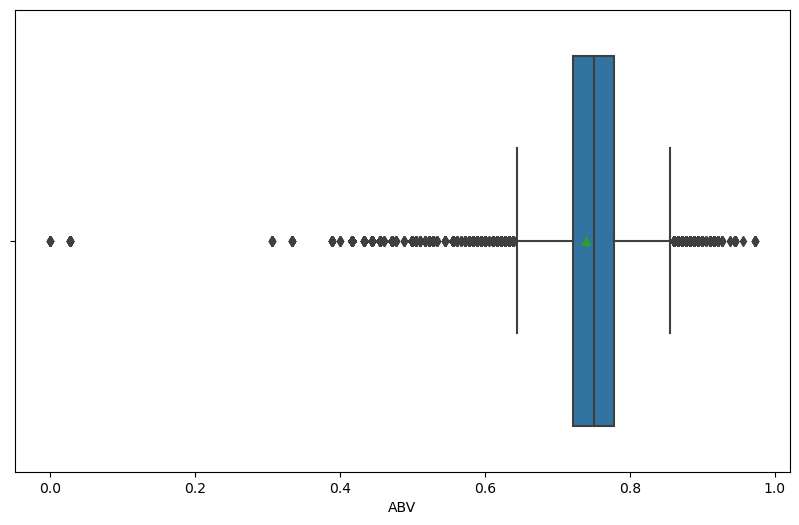

In [17]:
# Calculate the IQR
numeric_df = encoded_df['ABV']
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_df, showmeans=True, orient="h")

Analyzing the resulting boxplot, we observe that some values fall outside the ranges but are still relevant, as 0% alcohol wines, including dealcoholized varieties, remain within the wine category. These options retain the essence of traditional wines without alcohol. Additionally, beverages like firewater, with higher alcohol content, can also bring value to the project.

### Correlation Matrix

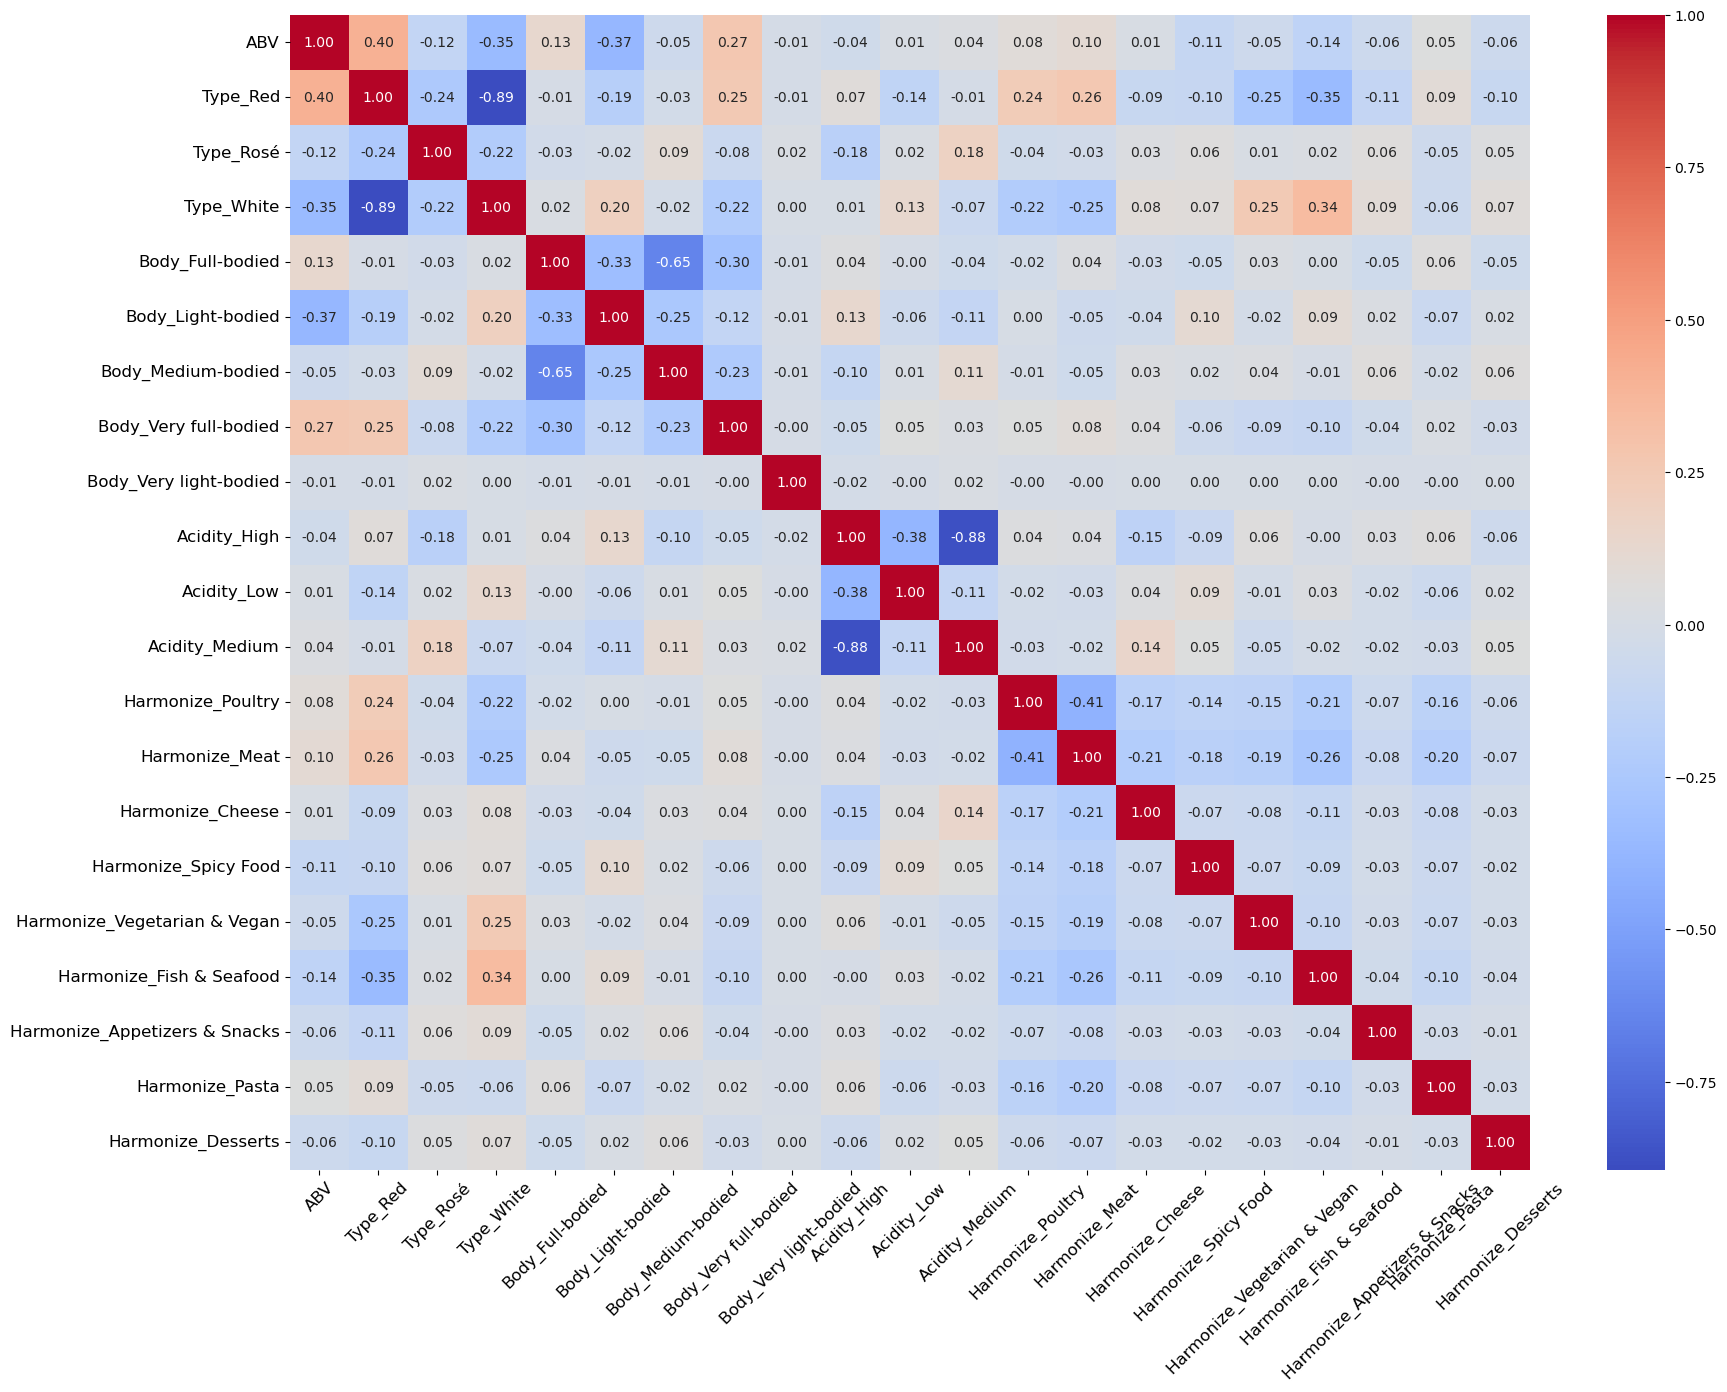

In [41]:
# Compute the correlation matrix without the Elaborate columns to reduce the size of the heatmap
drop_columns = encoded_df.columns[encoded_df.columns.str.startswith('Elaborate_')]
drop_columns = drop_columns.append(encoded_df.columns[encoded_df.columns.str.startswith('Grapes_')])
matrix_df = encoded_df.drop(columns=drop_columns)
correlation_matrix = matrix_df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    annot_kws={"size": 10}
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Analyzing the matrix, we observe that it is relatively ‘cold,’ meaning it exhibits a low correlation index overall. Despite the generally low correlations between features, certain specific relationships do stand out. For instance, some dishes in the ‘Harmonize’ category show a notable correlation with particular wines, while certain body characteristics correlate with the alcohol by volume (ABV) and wine types.

### PCA

Generating PCA plot for label column: Harmonize_Poultry


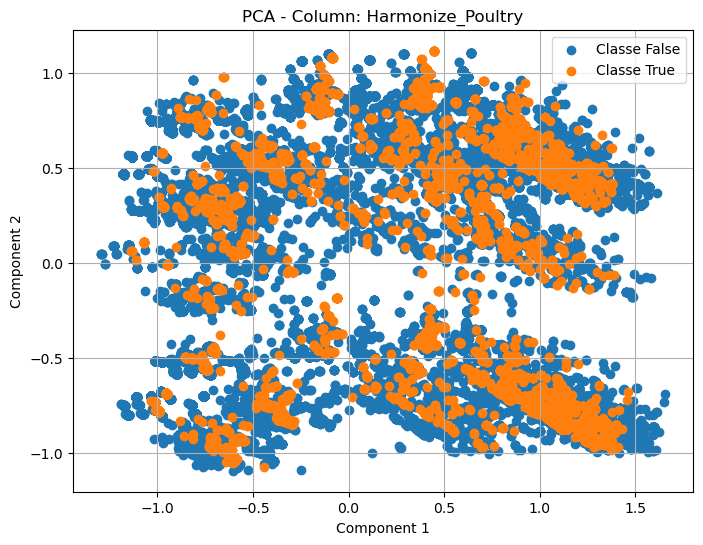

Generating PCA plot for label column: Harmonize_Meat


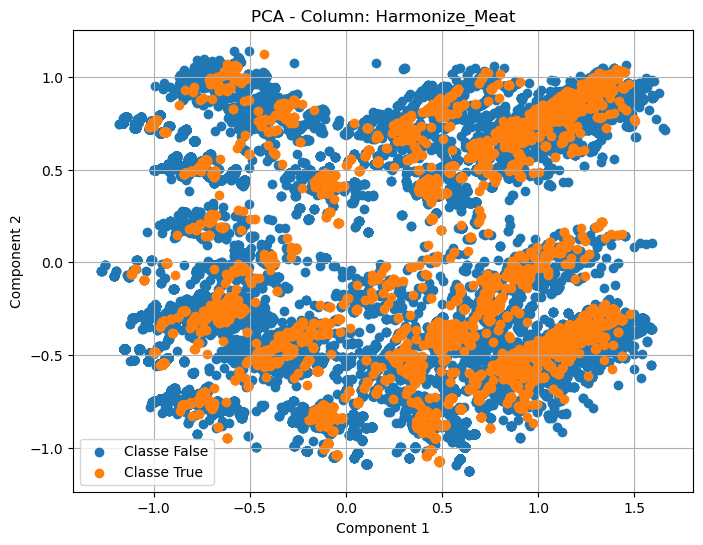

Generating PCA plot for label column: Harmonize_Cheese


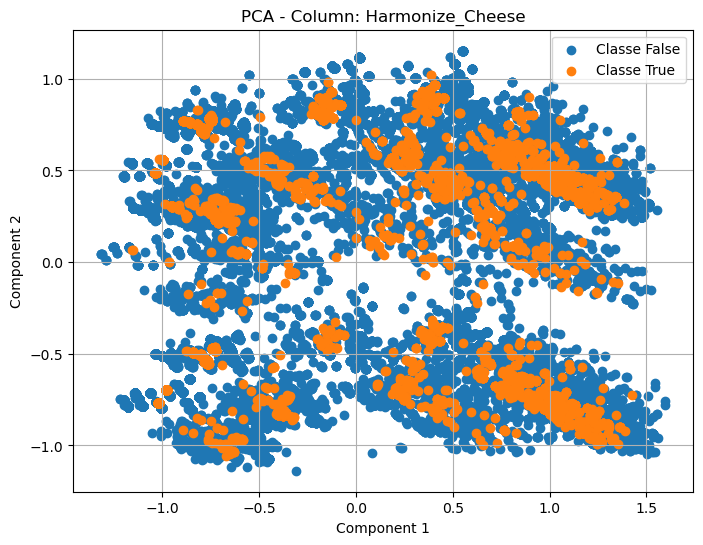

Generating PCA plot for label column: Harmonize_Spicy Food


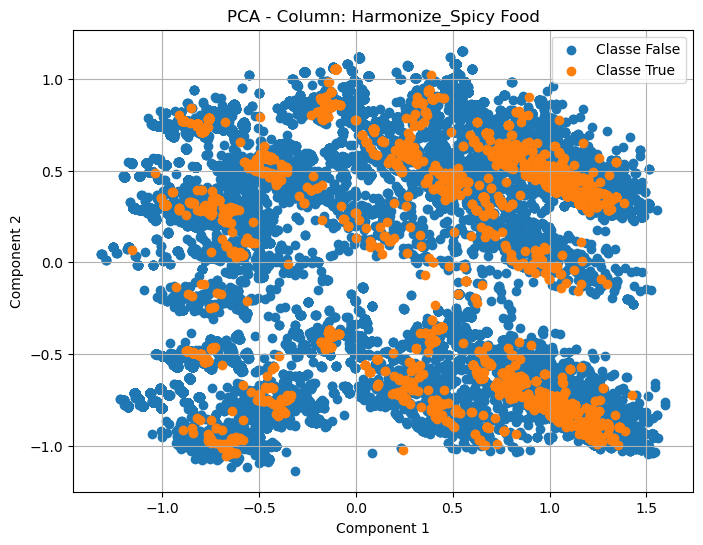

Generating PCA plot for label column: Harmonize_Vegetarian & Vegan


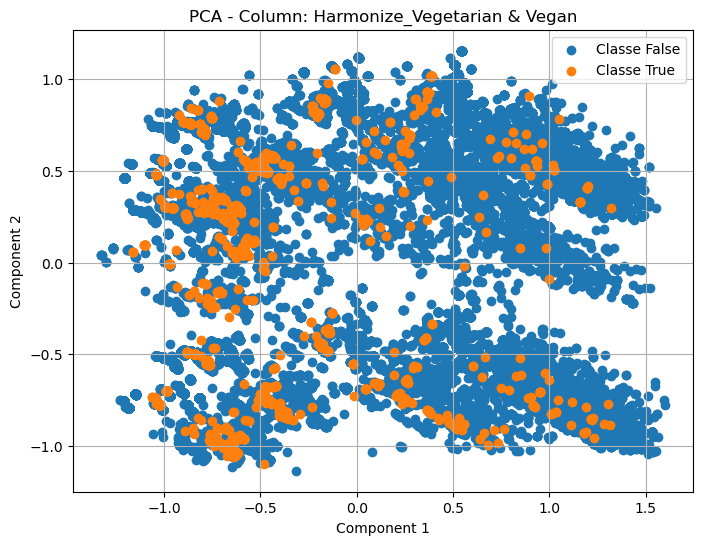

Generating PCA plot for label column: Harmonize_Fish & Seafood


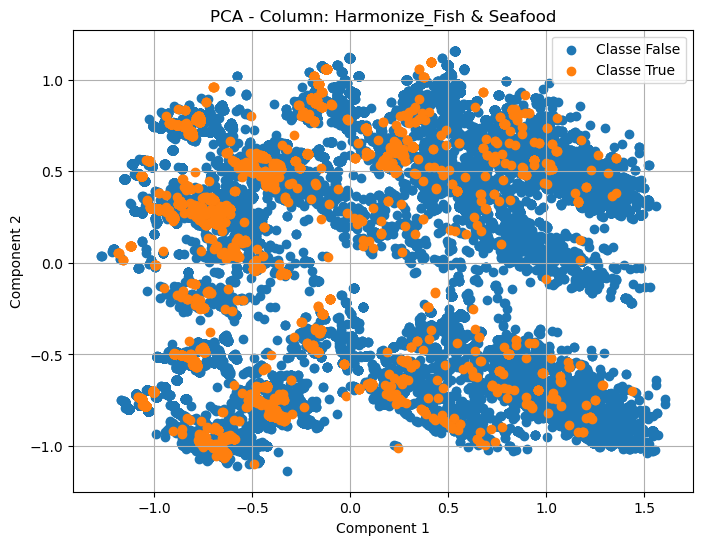

Generating PCA plot for label column: Harmonize_Appetizers & Snacks


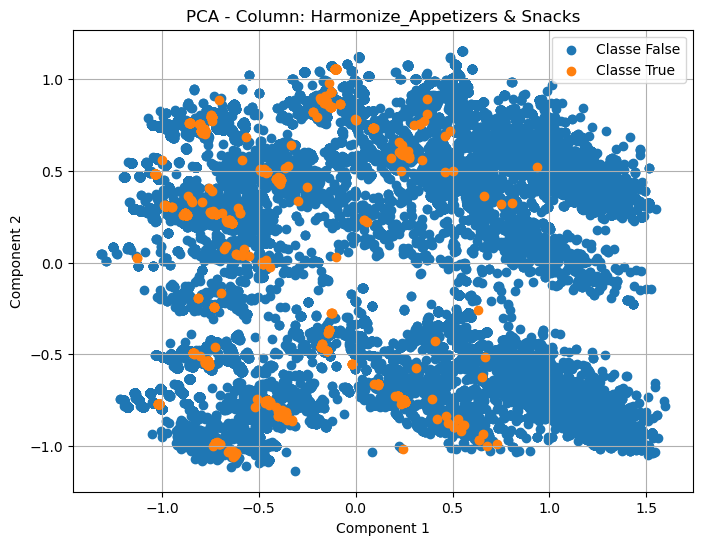

Generating PCA plot for label column: Harmonize_Pasta


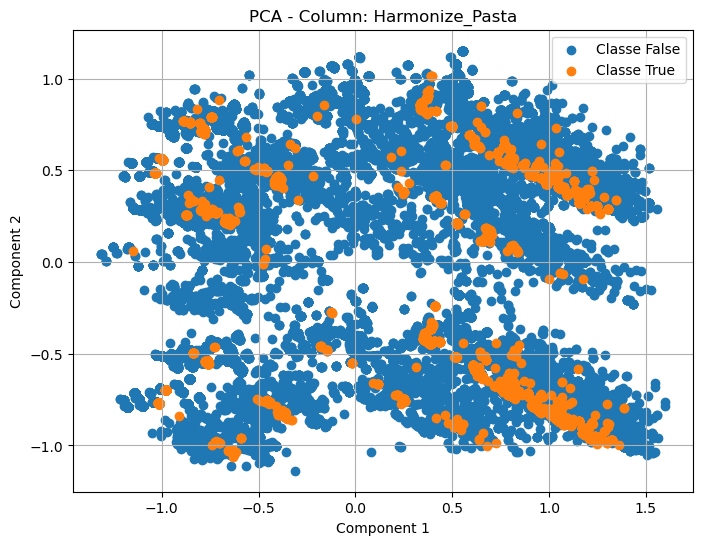

Generating PCA plot for label column: Harmonize_Desserts


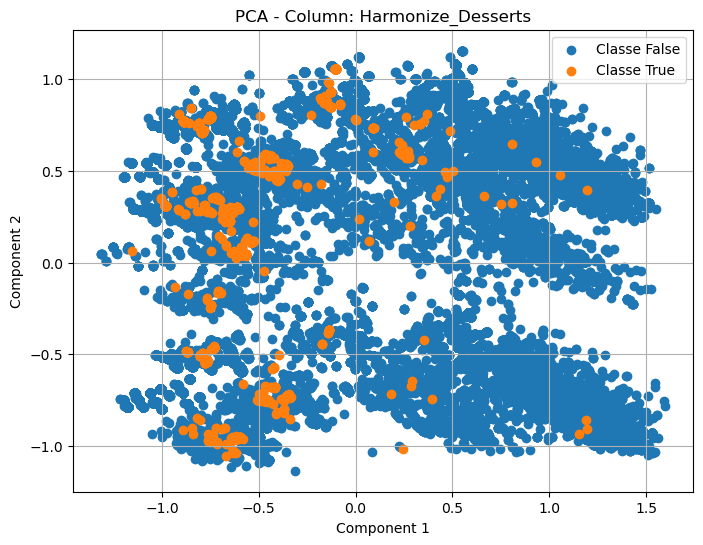

In [39]:
from sklearn.decomposition import PCA

harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]

# Loop through each 'harmonize_' column and perform PCA
for label_col in harmonize_columns:
    print(f"Generating PCA plot for label column: {label_col}")

    features = encoded_df.drop(columns=[label_col])
    labels = encoded_df[label_col].values

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(
            df_pca[labels == label, 0], 
            df_pca[labels == label, 1], 
            label=f'Classe {label}'
        )

    plt.title(f'PCA - Column: {label_col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid()
    plt.show()

When applying PCA to identify patterns and relationships among the different categories in the ‘Harmonize’ column, we encountered inconclusive results. The resulting plots showed the various categories exhibiting similar patterns, with data points widely scattered across the graphical space rather than concentrated in specific zones.

# GradientBoostingClassifier

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight

## Type Classification

In [26]:
harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]
type_columns = [col for col in encoded_df.columns if col.startswith('Type_')]

X = encoded_df[harmonize_columns]
y = encoded_df[type_columns]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

y_train_labels = y_train.idxmax(axis=1).str.replace("Type_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Type_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Type_", "", regex=True)


gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [5, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_labels)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

print("Gradient Boosting Validation Accuracy:", accuracy_score(y_val_labels, gb_val_predictions))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test_labels, gb_test_predictions))

print("Classification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.3s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.4s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.4s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.4s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.8s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.8s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.8s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.8s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         Red       0.69      0.90      0.78     22553
        Rosé       0.00      0.00      0.00      2474
       White       0.77      0.60      0.67     19668

    accuracy                           0.72     44695
   macro avg       0.49      0.50      0.48     44695
weighted avg       0.69      0.72      0.69     44695



/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Upon analyzing the results, it is evident that the model’s accuracy is relatively modest, at approximately 72%. However, for the objectives of our project, this level of accuracy is acceptable. Despite not being close to 100%, the consistency between the validation and test accuracy values indicates that the model does not exhibit significant overfitting. This alignment suggests that the model has generalized reasonably well to unseen data within the scope of our study. The major problem with results is the lack of prediction to the Rosé wine.

### Type Classification with SMOTE

In [10]:
harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]
type_columns = [col for col in encoded_df.columns if col.startswith('Type_')]

X = encoded_df[harmonize_columns]
y = encoded_df[type_columns]
X = X.astype(int)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

y_train_labels = y_train.idxmax(axis=1).str.replace("Type_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Type_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Type_", "", regex=True)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_labels)

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [5, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

print("Gradient Boosting Validation Accuracy:", accuracy_score(y_val_labels, gb_val_predictions))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test_labels, gb_test_predictions))

print("Classification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   4.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   4.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   4.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   4.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   4.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   9.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

With the use of SMOTE the accuracy has decreased. Although the accuracy is now 64%, not the most desirable result it is still usable in the scope of the project.

# Grapes Classification

### Multi-labeling

In [87]:
grape_columns = [col for col in encoded_df.columns if col.startswith('Grapes_')]
X = encoded_df[harmonize_columns]
y = encoded_df[grape_columns]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
multi_label_model = MultiOutputClassifier(gb_model)

param_dist = {
    'estimator__n_estimators': [5, 10, 30],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 5],
}

random_search = RandomizedSearchCV(
    estimator=multi_label_model, 
    param_distributions=param_dist,
    n_iter=10, 
    cv=3, 
    scoring='f1_macro', 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_


#Threshold#

val_probabilities = best_model.predict_proba(X_val)
test_probabilities = best_model.predict_proba(X_test)

val_probabilities = np.array([probs[:, 1] for probs in val_probabilities]).T
test_probabilities = np.array([probs[:, 1] for probs in test_probabilities]).T

threshold = 0.05
gb_val_predictions = (val_probabilities >= threshold).astype(int)
gb_test_predictions = (test_probabilities >= threshold).astype(int)
#

print("\nClassification Report for Validation Set with Adjusted Threshold:")
print(classification_report(y_val, gb_val_predictions, zero_division=0))

print("\nClassification Report for Test Set with Adjusted Threshold:")
print(classification_report(y_test, gb_test_predictions, zero_division=0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=5; total time=   5.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=5; total time=   5.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=5; total time=   5.1s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=10; total time=   9.5s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=10; total time=   9.5s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=10; total time=   9.5s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=5; total time=   6.2s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=5; total time=   6.3s
[CV] END estimator__learning_rate=0.01, estimator__max_d

The model initially failed to predict grape types, even after adjusting the threshold. Minor improvements were observed, but most grapes remained unclassified. These results were unusable, so blends were removed, allowing us to switch to single-label classification.

### Classification without blends

In [ ]:
grape_columns = [col for col in encoded_df_without_blends.columns if col.startswith('Grapes_')]

X = encoded_df_without_blends[harmonize_columns]
y = encoded_df_without_blends[grape_columns]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

y_train_labels = y_train.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Grapes_", "", regex=True)

param_dist = {
    'n_estimators': [5, 10, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
}

gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train_labels)

best_model = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)

gb_val_predictions = best_model.predict(X_val)

gb_test_predictions = best_model.predict(X_test)

print("Classification Report for Gradient Boosting on Val Set:")
print(classification_report(y_val_labels, gb_val_predictions))

print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test_labels, gb_test_predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   3.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   3.2s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   3.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   6.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   6.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   6.1s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=   3.1s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=   3.1s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=   3.3s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=10; total time=   5.9s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=30; total time=  17.2s
[CV] END ....learning_rate=0.1, max_depth=3, n_e

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

           Barbera       0.00      0.00      0.00       329
    Cabernet Franc       0.00      0.00      0.00       438
Cabernet Sauvignon       0.00      0.00      0.00      2156
        Chardonnay       0.29      0.85      0.43      4106
      Chenin Blanc       0.00      0.00      0.00       247
    Gewürztraminer       0.00      0.00      0.00       444
          Grenache       0.00      0.00      0.00       707
            Malbec       0.00      0.00      0.00       584
            Merlot       0.00      0.00      0.00       602
          Nebbiolo       0.00      0.00      0.00       422
      Pinot Grigio       0.29      0.23      0.25       229
        Pinot Gris       0.00      0.00      0.00       227
        Pinot Noir       0.22      0.45      0.29      2183
         Primitivo       0.00      0.00      0.00       197
          Riesling       0.43      0.26      0.33      2002
        Sangiovese       0.00      0.00

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

           Barbera       0.00      0.00      0.00       456
    Cabernet Franc       0.00      0.00      0.00       495
Cabernet Sauvignon       0.00      0.00      0.00      2637
        Chardonnay       0.28      0.85      0.42      5055
      Chenin Blanc       0.00      0.00      0.00       277
    Gewürztraminer       0.00      0.00      0.00       583
          Grenache       0.00      0.00      0.00       828
            Malbec       0.00      0.00      0.00       719
            Merlot       0.00      0.00      0.00       780
          Nebbiolo       0.00      0.00      0.00       500
      Pinot Grigio       0.25      0.19      0.22       341
        Pinot Gris       0.00      0.00      0.00       267
        Pinot Noir       0.23      0.47      0.31      2719
         Primitivo       0.00      0.00      0.00       279
          Riesling       0.41      0.24      0.30      2488
        Sangiovese       0.00      0.00

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Upon analyzing the results, it is evident that the accuracy of the grape classification is relatively poor, around 28%. This suggests a low correlation between the distinct meals and the grape varieties. Additionally, this result may imply that the current classification model is not well-suited for the dataset. Nevertheless, the observation that the validation and test accuracies are nearly identical is a positive sign, suggesting that the model is not overfitting and has maintained consistency across unseen data.
Additionally, we can verify that the model failed to predict some grapes, this is a problem that normally can be fixed by using balancing techniques.

### Classification without blends with SMOTE

In [32]:
grape_columns = [col for col in encoded_df_without_blends.columns if col.startswith('Grapes_')]
harmonize_columns = [col for col in encoded_df_without_blends.columns if col.startswith('Harmonize_')]

X = encoded_df_without_blends[harmonize_columns]
y = encoded_df_without_blends[grape_columns]
X = X.astype(int)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

y_train_labels = y_train.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Grapes_", "", regex=True)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_labels)

print("Original training set size:", X_train.shape)
print("Resampled training set size:", X_train_resampled.shape)

gb_model = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': [5, 10, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
}

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

best_model = random_search.best_estimator_

gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

print("Classification Report for Gradient Boosting on Val Set:")
print(classification_report(y_val_labels, gb_val_predictions))

print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test_labels, gb_test_predictions))

Original training set size: (72022, 9)
Resampled training set size: (344463, 9)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  15.8s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  15.8s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  16.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=  30.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=  31.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=  31.0s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=  17.1s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=  17.4s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=  17.1s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=10; total time=  30.1s
[CV] END ....learning_rate=0.1, max_depth=3, n_es

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

           Barbera       0.00      0.00      0.00       329
    Cabernet Franc       0.00      0.00      0.00       438
Cabernet Sauvignon       0.00      0.00      0.00      2156
        Chardonnay       0.00      0.00      0.00      4106
      Chenin Blanc       0.04      0.63      0.07       247
    Gewürztraminer       0.00      0.00      0.00       444
          Grenache       0.00      0.00      0.00       707
            Malbec       0.00      0.00      0.00       584
            Merlot       0.07      0.69      0.12       602
          Nebbiolo       0.00      0.00      0.00       422
      Pinot Grigio       0.25      0.19      0.22       229
        Pinot Gris       0.06      0.27      0.09       227
        Pinot Noir       0.23      0.46      0.30      2183
         Primitivo       0.06      0.31      0.10       197
          Riesling       0.00      0.00      0.00      2002
        Sangiovese       0.00      0.00

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

           Barbera       0.00      0.00      0.00       456
    Cabernet Franc       0.00      0.00      0.00       495
Cabernet Sauvignon       0.00      0.00      0.00      2637
        Chardonnay       0.00      0.00      0.00      5055
      Chenin Blanc       0.04      0.64      0.07       277
    Gewürztraminer       0.00      0.00      0.00       583
          Grenache       0.00      0.00      0.00       828
            Malbec       0.00      0.00      0.00       719
            Merlot       0.08      0.73      0.14       780
          Nebbiolo       0.00      0.00      0.00       500
      Pinot Grigio       0.31      0.21      0.25       341
        Pinot Gris       0.06      0.29      0.10       267
        Pinot Noir       0.22      0.45      0.29      2719
         Primitivo       0.06      0.29      0.10       279
          Riesling       0.00      0.00      0.00      2488
        Sangiovese       0.00      0.00

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Upon analyzing the results, it is evident that many grape types were not predicted, and the model’s accuracy stands at only 12%, which is significantly low.

### Classification without blends with SMOTEENN (Mix of SMOTE and undersampling)

In [90]:
grape_columns = [col for col in encoded_df_without_blends.columns if col.startswith('Grapes_')]

X = encoded_df_without_blends[harmonize_columns]
y = encoded_df_without_blends[grape_columns]
X = X.astype(int)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

######
y_train_labels = y_train.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Grapes_", "", regex=True)

label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train_labels)
y_val_labels = label_encoder.transform(y_val_labels)
y_test_labels = label_encoder.transform(y_test_labels)
######

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train_labels)

print("Original training set size:", X_train.shape)
print("Resampled training set size:", X_train_resampled.shape)

Original training set size: (72022, 9)
Resampled training set size: (43, 9)


With such a small training set is not viable to proceed.

### Classification without blends with RandomUnderSampler

In [35]:
grape_columns = [col for col in encoded_df_without_blends.columns if col.startswith('Grapes_')]

X = encoded_df_without_blends[harmonize_columns]
y = encoded_df_without_blends[grape_columns]
X = X.astype(int)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


y_train_labels = y_train.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Grapes_", "", regex=True)


undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train_labels)

print("Original training set size:", X_train.shape)
print("Resampled training set size:", X_train_resampled.shape)

param_dist = {
    'n_estimators': [5, 10, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
}

gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_resampled, y_train_resampled)

best_model = random_search.best_estimator_

gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

print("\nClassification Report for Gradient Boosting on Validation Set:")
print(classification_report(y_val_labels, gb_val_predictions))

print("\nClassification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

Original training set size: (72022, 9)
Resampled training set size: (15435, 9)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.5s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   1.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   1.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   1.2s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=   0.6s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=10; total time=   1.1s
[CV] END ....learning_rate=0.1, max_depth=3, n_est

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/p

                    precision    recall  f1-score   support

           Barbera       0.00      0.00      0.00       456
    Cabernet Franc       0.00      0.00      0.00       495
Cabernet Sauvignon       0.00      0.00      0.00      2637
        Chardonnay       0.00      0.00      0.00      5055
      Chenin Blanc       0.04      0.64      0.07       277
    Gewürztraminer       0.00      0.00      0.00       583
          Grenache       0.00      0.00      0.00       828
            Malbec       0.00      0.00      0.00       719
            Merlot       0.08      0.73      0.14       780
          Nebbiolo       0.00      0.00      0.00       500
      Pinot Grigio       0.31      0.21      0.25       341
        Pinot Gris       0.06      0.29      0.10       267
        Pinot Noir       0.22      0.45      0.29      2719
         Primitivo       0.06      0.29      0.10       279
          Riesling       0.00      0.00      0.00      2488
        Sangiovese       0.00      0.00

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Upon analyzing the results, it is evident that many grape types were not predicted, and the model’s accuracy stands at only 12%, which is significantly low.

### Classification without blends with SMOTE + RandomUnderSampler

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

grape_columns = [col for col in encoded_df_without_blends.columns if col.startswith('Grapes_')]

X = encoded_df_without_blends[harmonize_columns]
y = encoded_df_without_blends[grape_columns]
X = X.astype(int)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

y_train_labels = y_train.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Grapes_", "", regex=True)

smote = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

resampling_pipeline = Pipeline([
    ('smote', smote),
    ('undersampler', undersampler)
])

X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train_labels)

print("Original training set size:", X_train.shape)
print("Resampled training set size:", X_train_resampled.shape)

param_dist = {
    'n_estimators': [5, 10, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
}

gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_resampled, y_train_resampled)

best_model = random_search.best_estimator_

gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

print("\nClassification Report for Gradient Boosting on Validation Set:")
print(classification_report(y_val_labels, gb_val_predictions))

print("\nClassification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

Original training set size: (72022, 9)
Resampled training set size: (344463, 9)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  15.0s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  15.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=  15.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=  29.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=  30.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=  30.4s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=  17.2s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=  16.9s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=  17.2s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=10; total time=  30.4s
[CV] END ....learning_rate=0.1, max_depth=3, n_es

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

           Barbera       0.00      0.00      0.00       329
    Cabernet Franc       0.00      0.00      0.00       438
Cabernet Sauvignon       0.00      0.00      0.00      2156
        Chardonnay       0.00      0.00      0.00      4106
      Chenin Blanc       0.04      0.63      0.07       247
    Gewürztraminer       0.00      0.00      0.00       444
          Grenache       0.00      0.00      0.00       707
            Malbec       0.00      0.00      0.00       584
            Merlot       0.07      0.69      0.12       602
          Nebbiolo       0.00      0.00      0.00       422
      Pinot Grigio       0.25      0.19      0.22       229
        Pinot Gris       0.06      0.27      0.09       227
        Pinot Noir       0.23      0.46      0.30      2183
         Primitivo       0.06      0.31      0.10       197
          Riesling       0.00      0.00      0.00      2002
        Sangiovese       0.00      0.00

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Upon analyzing the results, it is evident that many grape types were not predicted, and the model’s accuracy stands at only 12%, which is significantly low.

### Classification without blends with weights

In [37]:
grape_columns = [col for col in encoded_df_without_blends.columns if col.startswith('Grapes_')]

X = encoded_df_without_blends[harmonize_columns]
y = encoded_df_without_blends[grape_columns]
X = X.astype(int)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

y_train_labels = y_train.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_val_labels = y_val.idxmax(axis=1).str.replace("Grapes_", "", regex=True)
y_test_labels = y_test.idxmax(axis=1).str.replace("Grapes_", "", regex=True)

label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train_labels)
y_val_labels = label_encoder.transform(y_val_labels)
y_test_labels = label_encoder.transform(y_test_labels)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weight_dict)

sample_weights = np.array([class_weight_dict[label] for label in y_train_labels])

param_dist = {
    'n_estimators': [5, 10, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
}

gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train_labels, sample_weight=sample_weights)

best_model = random_search.best_estimator_

gb_val_predictions = best_model.predict(X_val)
gb_test_predictions = best_model.predict(X_test)

print("\nClassification Report for Gradient Boosting on Validation Set:")
print(classification_report(y_val_labels, gb_val_predictions))

print("\nClassification Report for Gradient Boosting on Test Set:")
print(classification_report(y_test_labels, gb_test_predictions))

Class weights: {0: 2.5292175867397106, 1: 2.007973681275789, 2: 0.39842228713046557, 3: 0.20908486542821725, 4: 3.5949885195168214, 5: 1.8771861234915421, 6: 1.2801862813061022, 7: 1.4550780855405379, 8: 1.5088513187941257, 9: 2.0186103870624175, 10: 3.4468533141899975, 11: 4.1520811714516315, 12: 0.3965335932037285, 13: 4.239331332038378, 14: 0.4356178137455922, 15: 1.266944605695991, 16: 0.735654021368307, 17: 1.6648636153490521, 18: 4.666148364107547, 19: 2.081079519186315, 20: 2.872377761824998}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   3.2s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   3.3s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   3.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   6.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   6.5s
[CV] END ...learning_rate=0.0

/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marco/anaconda3/lib/p

Upon analyzing the results, it is evident that many grape types were not predicted, and the model’s accuracy stands at only 12%, which is significantly low.

# Wine Type Classification Summary

To classify the Wine Type using the harmonized columns, a Gradient Boosting Classifier was employed. The initial analysis revealed that not all types were predicted, likely due to an imbalance in the dataset, where White and Red wines dominated. To address this, SMOTE was applied to balance the dataset. When paired with the model, all wine types were successfully predicted, achieving an accuracy of 64%. While this is far from perfect, it is sufficient for the project’s objectives.

# Grape Classification Summary

The same Gradient Boosting model was applied to classify grape types, but the initial results were unimpressive. To improve performance, several techniques were tested:
* Multi-Labeling Classification
* Single-Labeling Classification with the removal of blends: Without optimizations
* Single-Labeling Classification with the removal of blends: With the use of SMOTE
* Single-Labeling Classification with the removal of blends: With the use of SMOTEENN
* Single-Labeling Classification with the removal of blends: With the use of RandomUnderSampling
* Single-Labeling Classification with the removal of blends: With the use of SMOTE + RandomUnderSampling
* Single-Labeling Classification with the removal of blends: With class weights

Despite these efforts, no technique delivered satisfactory results. Accuracy remained low, and several grape types were left unclassified. The best performance came from Single-Label Classification with blends removed and no optimizations, yielding an accuracy of only 28%. Even then, some grape types lacked classification.To fine-tune the model further, GridSearch and RandomSearch were used to identify better hyperparameters. However, improvements were marginal. Finally, an additional adjustment was made by removing rows where grapes had very few wines associated, in an attempt to mitigate the class imbalance and improve accuracy.

